In [2]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
from os import getenv
from openai import OpenAI

load_dotenv("../.env",override=True)

True

In [3]:

data = open("2023/data2023.txt").read().split("\n\n")
data = [[y for y in x.split("\n") if y != "" and "Logo" not in y] for x in data if x != ""]
bad = [[len(x),x] for x in data if len(x) != 22]
good2023 = [x for x in data if len(x) == 22]
len(good2023)

data = open("2024/data2024.txt").read().split("\n\n")
data = [[y for y in x.split("\n") if y != "" and "Logo" not in y] for x in data if x != ""]
bad = [[len(x),x] for x in data if len(x) != 22]
good2024 = [x for x in data if len(x) == 22]
len(good2024)

labels = ["organization name","num employees", "founded date","description","industries","headquarters location","description","cb rank","postal code","headquarters region","website","actively hiring","linkedin","num articles","email","hub tag","phone num","num of sub org","industry groups","total funding amt","company type","estimated rev"]
dataset = good2023 + good2024
df = pd.DataFrame(dataset,columns=labels)

In [8]:
df[df["num employees"]=="11-50"]

,organization name,num employees,founded date,description,industries,headquarters location,description,cb rank,postal code,headquarters region,...,linkedin,num articles,email,hub tag,phone num,num of sub org,industry groups,total funding amt,company type,estimated rev
981,Mistral AI,11-50,2023,Mistral AI is an AI startup that provides deve...,"Artificial Intelligence (AI), Generative AI, M...","Paris, Ile-de-France, France",Mistral AI is an AI startup that provides deve...,7,75001,"European Union (EU), Europe, Middle East, and ...",...,View on LinkedIn,113,contact@mistral.ai,—,Unicorn,—,"Artificial Intelligence (AI), Data and Analyti...","€1,105,000,000",For Profit,—
982,Sierra,11-50,2023,Sierra is an AI startup that tackles essential...,"Artificial Intelligence (AI), Enterprise Softw...","San Francisco, California, United States",Sierra is an AI startup that tackles essential...,259,—,"San Francisco Bay Area, West Coast, Western US",...,View on LinkedIn,3,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$110,000,000",—,—
983,Essential AI,11-50,2023,Essential AI creates AI solutions that enhance...,"Artificial Intelligence (AI), Information Tech...","San Francisco, California, United States",Essential AI creates AI solutions that enhance...,321,—,"San Francisco Bay Area, West Coast, Western US",...,View on LinkedIn,17,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$64,500,000",For Profit,—
984,Lindy,11-50,2023,Lindy is an AI assistant that can help with al...,"Artificial Intelligence (AI), Internet, Softwa...","San Francisco, California, United States",Your AI executive assistant.,599,—,"San Francisco Bay Area, West Coast, Western US",...,View on LinkedIn,1,lindy@lindy.ai,6048488619,—,—,"Apps, Artificial Intelligence (AI), Data and A...","$49,900,000",For Profit,$1M to $10M
985,Poolside,11-50,2023,Poolside is an artificial intelligence platfor...,"Artificial Intelligence (AI), Developer Platfo...","Paris, Ile-de-France, France",Poolside is an artificial intelligence platfor...,924,—,"European Union (EU), Europe, Middle East, and ...",...,View on LinkedIn,5,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$126,000,000",For Profit,—
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5217,Go To Groww,11-50,"May 15, 2024",Our expert marketing team specializes in bespo...,"Advertising, App Marketing, Brand Marketing, C...","Noida, Uttar Pradesh, India",Go To Groww is a Full-Service AI-based Digital...,—,201307,Asia-Pacific (APAC),...,View on LinkedIn,3,connect@gotogroww.com,—,09289497982,—,"Advertising, Sales and Marketing",—,For Profit,—
5235,Vison AI,11-50,"May 27, 2024",Vison is an innovative content writing tool th...,"Artificial Intelligence (AI), Content, Content...","Portland, Oregon, United States",Vison multi-skilled AI is developed for Indivi...,—,97214,"West Coast, Western US",...,View on LinkedIn,—,info@infiniticube.com,—,+1 415-800-2907,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—
5238,Sagui.AI,11-50,"May 28, 2024",Sagui AI is an all-in-one solution that can ge...,"Artificial Intelligence (AI), Content Marketin...",—,The AI-powered website builder that generates ...,—,—,—,...,View on LinkedIn,—,fabio@sagui.ai,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—
5240,Cybrius,11-50,"May 29, 2024","Welcome to Cybrius, A groundbreaking tech comp...",Information Technology,"Amsterdam, Noord-Holland, The Netherlands",Artificial Intelligence,—,—,"European Union (EU), Europe, Middle East, and ...",...,—,—,info@cybriusai.com,—,—,—,Information Technology,—,For Profit,—


In [9]:
df['description_all'] = df['description'].iloc[:,0] + " " + df['description'].iloc[:,1]


In [106]:
sample_df = df.iloc[0:200]
sample_df.head()

,organization name,num employees,founded date,description,industries,headquarters location,description,cb rank,postal code,headquarters region,...,num articles,email,hub tag,phone num,num of sub org,industry groups,total funding amt,company type,estimated rev,description_all
0,Pika,1-10,2023,Pika is a startup that is developing an AI-pow...,"Artificial Intelligence (AI), Generative AI, G...","Palo Alto, California, United States",Pika is a startup that develops an AI-powered ...,78,—,"San Francisco Bay Area, Silicon Valley, West C...",...,7,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$135,000,000",For Profit,—,Pika is a startup that is developing an AI-pow...
1,Contextual AI,1-10,2023,Contextual AI offers a pioneering approach to ...,"Artificial Intelligence (AI), Generative AI, S...","Mountain View, California, United States",Contextual AI offers a pioneering approach to ...,219,94040,"San Francisco Bay Area, Silicon Valley, West C...",...,4,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$20,000,000",For Profit,—,Contextual AI offers a pioneering approach to ...
2,Liquid AI,1-10,2023,Liquid AI is a developer of AI applications th...,"Artificial Intelligence (AI), Generative AI, I...","Cambridge, Massachusetts, United States",Liquid AI is a developer of AI applications th...,516,02142,"Greater Boston Area, East Coast, New England",...,12,ramin@liquid.ai,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$43,200,000",For Profit,$1M to $10M,Liquid AI is a developer of AI applications th...
3,Ava,1-10,2023,Ava is an AI dating app.,Software,"Paris, Ile-de-France, France",Ava is an AI dating app.,653,—,"European Union (EU), Europe, Middle East, and ...",...,—,clara@deeptime.io,—,—,—,Software,"$5,750,000",For Profit,—,Ava is an AI dating app. Ava is an AI dating app.
4,LlamaIndex,1-10,2023,"LlamaIndex is a simple, flexible data framewor...","Artificial Intelligence (AI), Software","San Francisco, California, United States","LlamaIndex is a simple, flexible data framewor...",814,—,"San Francisco Bay Area, West Coast, Western US",...,13,—,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","$8,500,000",For Profit,$1M to $10M,"LlamaIndex is a simple, flexible data framewor..."


In [63]:
from dotenv import load_dotenv
import os
from os import getenv
from openai import OpenAI
# Load the .env file
load_dotenv("../.env",override=True)

key = os.getenv("OPENAI_API_KEY")


class chatGPT():
    def __init__(self):
        my_key = getenv("OPENAI_API_KEY")
        self.client = OpenAI(api_key=my_key)
        
    def ask(self, q):
        stream = self.client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": q}],
            stream=True,
            temperature=0
        )
        response = ""
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                response += chunk.choices[0].delta.content

        self.response = response
        return response



# prompt = """
# Your role is to decompose a description of a company into keywords about what they do. Make simple please!

# EXAMPLES BELOW 
# _________________________
# Description:
# Pika is a startup that is developing an AI-powered platform for editing and generating films from captions and still images. The company aims to revolutionize the video creation and editing process through the integration of AI, offering a user-friendly and easily accessible tool for users. Pika is a startup that develops an AI-powered platform for editing and generating films from captions and still images.
# Shortened:
# video & image generation

# Descriotion:Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience
# Shortened:
# general purppse


# _________________________
# Now, your turn:
# Description: $description
# Shortened:
# """


# results = []
# x = chatGPT()
# descriptions = sample_df.description_all
# for i in range(len(sample_df)):
#     p1 = prompt.replace("$description", descriptions[i])
#     result = x.ask(p1)
#     print(descriptions[i])
#     print(result)
#     # Append the description and result to the DataFrame
#     results.append(result)






In [64]:
# sample_df['shortened_description'] = results
# # sample_df['shortened_description'] = sample_df['shortened_description'].str.replace("AI", "").str.replace("  ", "").str.replace("-", "")
# sample_df.head()


In [67]:
prompt = """
Your role is to give a description of what a company does as well as their target client/industries. Make it simple and understandable. Do not use a full sentence.

- DO NOT INCLUDE WORDS IN THIS LIST: ["AI-driven", "AI-powered", "workflow", "AI"]
- ONLY USE NOUNS IN THE PRODUCT (make it simple for someone not in tech to understand)
- TARGET INDUSTRY has to be specific business, CANNOT be "someone/business in need of ..."
- DO NOT MAKE FULL SENTENCE (comma separated list) 

EXAMPLES BELOW 
_________________________
Company: Genmo
Website: https://www.genmo.ai/
Description:Genmo is an artificial intelligence creative content generation platform that specializes in developing creative products. Genmo is an artificial intelligence creative content generation platform that specializes in developing creative products.
Product:
AI-powered video creation, Text-to-video generation, Generative art
Target Client/Industries: content creators, marketers, educators

Company: GuardRails
Website: https://www.guardrails.io/
Description: Guardrails AI aim to unlock an unparalleled scale of potential, ensuring the reliable, safe, and beneficial application of AI technology to improve human life. It is committed to eliminating the uncertainties inherent in AI interactions, providing goal-oriented, contractually bound solutions. Guardrails AI empowers humanity to harness the unprecedented capabilities of foundation AI models.
Product:
Continuous Security Scanning, Source Code Analysis (SAST), Dependency Analysis (SCA), Secret Detection, Cloud Security Analysis
Target Client/Industries: code development teams 

Company: Liquid AI
Website: https://www.liquid.ai/
Description: Liquid AI is a developer of AI applications that help improve human experience. It focuses on researching and developing tools that use artificial intelligence to improve creative workflows and help clients manage their workflow efficiently. Liquid AI is a developer of AI applications that help improve human experience
Product:
neural network ai application
Target Client/Industries: general purpose

________________________
Now, your turn:
Company: $company
Website: $website
Description: $description
Product: --
Target Client/Industries: --
"""


results = []
x = chatGPT()
websites = sample_df.website
companies = sample_df["organization name"]
descriptions = sample_df.description_all
for i in range(200):
    print(companies[i])
    p1 = prompt.replace("$website", websites[i]).replace("$company", companies[i]).replace("$description", descriptions[i])
    result = x.ask(p1)
    print(result)
    # Append the description and result to the DataFrame
    results.append(result)

Pika
Product: Film editing platform, Caption-to-video generation, Still image-to-video generation
Target Client/Industries: Film producers, Video editors, Advertising agencies
Contextual AI
Product: Generative software, Workplace efficiency tools
Target Client/Industries: Office-based businesses, Corporate sectors
Liquid AI
Product: Neural network applications, Creative tools
Target Client/Industries: Graphic designers, Digital artists, Media companies
Ava
Product: Dating application, Matchmaking service
Target Client/Industries: Single individuals, Dating industry
LlamaIndex
Product: Data framework, Custom data source connection, Large language models
Target Client/Industries: Data scientists, Research institutions, Tech companies
MagicSchool AI
Product: 
Educational content generation, Lesson planning assistance, Assessment creation tools, Communication tools

Target Client/Industries: 
Teachers, Educational institutions, Tutoring services
Voltage Park
Product: Machine learning infra

KeyError: 169

In [107]:
sample_df = sample_df.iloc[0:169]

In [68]:
sample_df['generated_description'] = results
sample_df.to_csv('sample_df.csv', index=False)
sample_df.head()

,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,headquarters region,...,estimated rev,description_all,embedding,cluster_label,generated_description,shortened_embedding,shortened_description,target_industries,industries_embedding,shortened_description_embedding
0,Pika,1-10,2023,Pika is a startup that is developing an AI-pow...,"Artificial Intelligence (AI), Generative AI, G...","Palo Alto, California, United States",Pika is a startup that develops an AI-powered ...,78,—,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Pika is a startup that is developing an AI-pow...,"[0.012334316037595272, 0.006155252456665039, -...",7,"Product: Film editing platform, Caption-to-vid...","[-0.004095326643437147, 0.04505584016442299, -...","AI-powered film editing and generation, Video ...","Filmmakers, Video Editors, Content Creators, M...","[-0.013917695730924606, 0.03840973228216171, -...","[-0.011559282429516315, 0.030042029917240143, ..."
1,Contextual AI,1-10,2023,Contextual AI offers a pioneering approach to ...,"Artificial Intelligence (AI), Generative AI, S...","Mountain View, California, United States",Contextual AI offers a pioneering approach to ...,219,94040,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Contextual AI offers a pioneering approach to ...,"[-0.03293931856751442, -0.004699342884123325, ...",11,"Product: Generative software, Workplace effici...","[0.01654336415231228, 0.023287253454327583, 0....","Generative AI for workplace applications, AI-p...","Corporations, tech companies, startups, AI con...","[-0.023459946736693382, 0.0033064140006899834,...","[0.011943372897803783, 0.006386549212038517, 0..."
2,Liquid AI,1-10,2023,Liquid AI is a developer of AI applications th...,"Artificial Intelligence (AI), Generative AI, I...","Cambridge, Massachusetts, United States",Liquid AI is a developer of AI applications th...,516,2142,"Greater Boston Area, East Coast, New England",...,$1M to $10M,Liquid AI is a developer of AI applications th...,"[-0.030698228627443314, 0.008265865035355091, ...",10,"Product: Neural network applications, Creative...","[0.01920264959335327, 0.04073550924658775, 0.0...","AI-driven workflow improvement tools, Creative...","Creative agencies, workflow managers, producti...","[0.014888757839798927, 0.028724199160933495, 0...","[0.018314482644200325, 0.040549661964178085, 0..."
3,Ava,1-10,2023,Ava is an AI dating app.,Software,"Paris, Ile-de-France, France",Ava is an AI dating app.,653,—,"European Union (EU), Europe, Middle East, and ...",...,—,Ava is an AI dating app. Ava is an AI dating app.,"[0.00809679925441742, -0.024050025269389153, 0...",21,"Product: Dating application, Matchmaking servi...","[-0.0316319614648819, -0.0006165459053590894, ...","AI-powered dating app, Virtual dating assistance","Singles, dating services, online dating industry","[-0.03009849414229393, -0.004982085898518562, ...","[-0.05003318563103676, 0.006910251919180155, 0..."
4,LlamaIndex,1-10,2023,"LlamaIndex is a simple, flexible data framewor...","Artificial Intelligence (AI), Software","San Francisco, California, United States","LlamaIndex is a simple, flexible data framewor...",814,—,"San Francisco Bay Area, West Coast, Western US",...,$1M to $10M,"LlamaIndex is a simple, flexible data framewor...","[-0.021693633869290352, -0.03820231929421425, ...",24,"Product: Data framework, Custom data source co...","[0.0005234783166088164, -0.03611835464835167, ...","Data integration, Custom data sourcing, Langua...","Companies dealing with large datasets, data sc...","[0.020727330818772316, -0.01563122123479843, 0...","[-0.049139682203531265, 0.01791500672698021, 0..."


In [69]:
sample_df[['shortened_description', 'target_industries']] = sample_df['generated_description'].str.extract(r'Product:\s*(.*)\s*Target Client/Industries:\s*(.*)').apply(lambda x: x.str.strip())
sample_df.head()

,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,headquarters region,...,estimated rev,description_all,embedding,cluster_label,generated_description,shortened_embedding,shortened_description,target_industries,industries_embedding,shortened_description_embedding
0,Pika,1-10,2023,Pika is a startup that is developing an AI-pow...,"Artificial Intelligence (AI), Generative AI, G...","Palo Alto, California, United States",Pika is a startup that develops an AI-powered ...,78,—,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Pika is a startup that is developing an AI-pow...,"[0.012334316037595272, 0.006155252456665039, -...",7,"Product: Film editing platform, Caption-to-vid...","[-0.004095326643437147, 0.04505584016442299, -...","Film editing platform, Caption-to-video genera...","Film producers, Video editors, Advertising age...","[-0.013917695730924606, 0.03840973228216171, -...","[-0.011559282429516315, 0.030042029917240143, ..."
1,Contextual AI,1-10,2023,Contextual AI offers a pioneering approach to ...,"Artificial Intelligence (AI), Generative AI, S...","Mountain View, California, United States",Contextual AI offers a pioneering approach to ...,219,94040,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Contextual AI offers a pioneering approach to ...,"[-0.03293931856751442, -0.004699342884123325, ...",11,"Product: Generative software, Workplace effici...","[0.01654336415231228, 0.023287253454327583, 0....","Generative software, Workplace efficiency tools","Office-based businesses, Corporate sectors","[-0.023459946736693382, 0.0033064140006899834,...","[0.011943372897803783, 0.006386549212038517, 0..."
2,Liquid AI,1-10,2023,Liquid AI is a developer of AI applications th...,"Artificial Intelligence (AI), Generative AI, I...","Cambridge, Massachusetts, United States",Liquid AI is a developer of AI applications th...,516,2142,"Greater Boston Area, East Coast, New England",...,$1M to $10M,Liquid AI is a developer of AI applications th...,"[-0.030698228627443314, 0.008265865035355091, ...",10,"Product: Neural network applications, Creative...","[0.01920264959335327, 0.04073550924658775, 0.0...","Neural network applications, Creative tools","Graphic designers, Digital artists, Media comp...","[0.014888757839798927, 0.028724199160933495, 0...","[0.018314482644200325, 0.040549661964178085, 0..."
3,Ava,1-10,2023,Ava is an AI dating app.,Software,"Paris, Ile-de-France, France",Ava is an AI dating app.,653,—,"European Union (EU), Europe, Middle East, and ...",...,—,Ava is an AI dating app. Ava is an AI dating app.,"[0.00809679925441742, -0.024050025269389153, 0...",21,"Product: Dating application, Matchmaking servi...","[-0.0316319614648819, -0.0006165459053590894, ...","Dating application, Matchmaking service","Single individuals, Dating industry","[-0.03009849414229393, -0.004982085898518562, ...","[-0.05003318563103676, 0.006910251919180155, 0..."
4,LlamaIndex,1-10,2023,"LlamaIndex is a simple, flexible data framewor...","Artificial Intelligence (AI), Software","San Francisco, California, United States","LlamaIndex is a simple, flexible data framewor...",814,—,"San Francisco Bay Area, West Coast, Western US",...,$1M to $10M,"LlamaIndex is a simple, flexible data framewor...","[-0.021693633869290352, -0.03820231929421425, ...",24,"Product: Data framework, Custom data source co...","[0.0005234783166088164, -0.03611835464835167, ...","Data framework, Custom data source connection,...","Data scientists, Research institutions, Tech c...","[0.020727330818772316, -0.01563122123479843, 0...","[-0.049139682203531265, 0.01791500672698021, 0..."


In [93]:
sample_df = pd.read_csv("sample_df.csv")
# sample_df = sample_df.head(50)


sample_df['shortened_description2'] = sample_df['shortened_description'].str.replace("AI-driven ", "").str.replace("AI-powered ", "").str.replace("AI-based ", "").str.replace("Generative AI for ","").str.replace("AI ","")

sample_df.shortened_description2.to_list()


['film editing and generation, Video creation from stills and captions',
 'workplace applications, Insights, Strategy Consulting',
 'workflow improvement tools, Creative Process Enhancement, Efficiency Management',
 'dating app, Virtual dating assistance',
 'Data integration, Custom data sourcing, Language modeling',
 'teacher assistance platform, Automatic lesson planning and assessment creation, Personalized educational content and recommendations',
 'Infrastructure for machine learning, Performance optimization for large ML models training',
 'research assistant, Relevant paper finder, Information extractor, Workflow automation',
 'Potential Unleashing, Reliable and Safe technology Applications, Uncertainties Elimination, Goal-oriented Solutions',
 'content generation, Video creation, Generative art design',
 'Generative application design and deployment, Model management, Compliance and experimentation tools',
 'Large language models platform, Semantic search engine',
 'software pl

In [137]:
a

array([[-0.02441338],
       [-0.03734099],
       [ 0.00103173],
       ...,
       [ 0.00432244],
       [-0.02996077],
       [-0.00307917]])

In [138]:
b

array([[-0.01772005],
       [-0.02944831],
       [ 0.00879996],
       ...,
       [-0.01952208],
       [ 0.00453513],
       [ 0.04120661]])

In [111]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


my_key = getenv("OPENAI_API_KEY")
client = OpenAI(api_key=my_key)


def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

sample_df['embedding'] = sample_df.generated_description.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
sample_df.to_csv('sample_df_embedded_results.csv', index=False)

In [143]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize the text and get input tensors
    inputs = tokenizer(text, return_tensors='pt')
    
    # Get the hidden states from BERT
    with torch.no_grad():
        outputs = model(**inputs)
        hidden_states = outputs.last_hidden_state
    
    # Take the mean of the token embeddings to get the sentence embedding
    sentence_embedding = torch.mean(hidden_states, dim=1).squeeze().numpy()
    return sentence_embedding

# Load your DataFrame (assuming you have a DataFrame named sample_df)
# sample_df = pd.read_csv('path_to_your_csv.csv')

# Apply the BERT embedding function to your generated descriptions
sample_df['bert_embedding'] = sample_df['generated_description'].apply(get_bert_embedding)

# Save the DataFrame with embeddings to a CSV file
sample_df.to_csv('sample_df_embedded_results.csv', index=False)

# Optional: Check the first few rows to ensure embeddings are added
print(sample_df.head())


  organization name num employees founded date  \
0              Pika          1-10         2023   
1     Contextual AI          1-10         2023   
2         Liquid AI          1-10         2023   
3               Ava          1-10         2023   
4        LlamaIndex          1-10         2023   

                                         description  \
0  Pika is a startup that is developing an AI-pow...   
1  Contextual AI offers a pioneering approach to ...   
2  Liquid AI is a developer of AI applications th...   
3                           Ava is an AI dating app.   
4  LlamaIndex is a simple, flexible data framewor...   

                                          industries  \
0  Artificial Intelligence (AI), Generative AI, G...   
1  Artificial Intelligence (AI), Generative AI, S...   
2  Artificial Intelligence (AI), Generative AI, I...   
3                                           Software   
4             Artificial Intelligence (AI), Software   

                      hea

In [32]:
# import ast
# sample_df = pd.read_csv("sample_df_embedded_results.csv")
# sample_df.embedding
# sample_df['embedding'] = sample_df['embedding'].apply(ast.literal_eval)
# sample_df.head()

Cosine Similarity Matrix:
[[1.         0.49308742 0.53685677 ... 0.2940031  0.4278322  0.40602944]
 [0.49308742 1.         0.56116657 ... 0.38954432 0.5636895  0.44222522]
 [0.53685677 0.56116657 1.         ... 0.33807174 0.44095657 0.52967731]
 ...
 [0.2940031  0.38954432 0.33807174 ... 1.         0.34425507 0.32444611]
 [0.4278322  0.5636895  0.44095657 ... 0.34425507 1.         0.40962397]
 [0.40602944 0.44222522 0.52967731 ... 0.32444611 0.40962397 1.        ]]


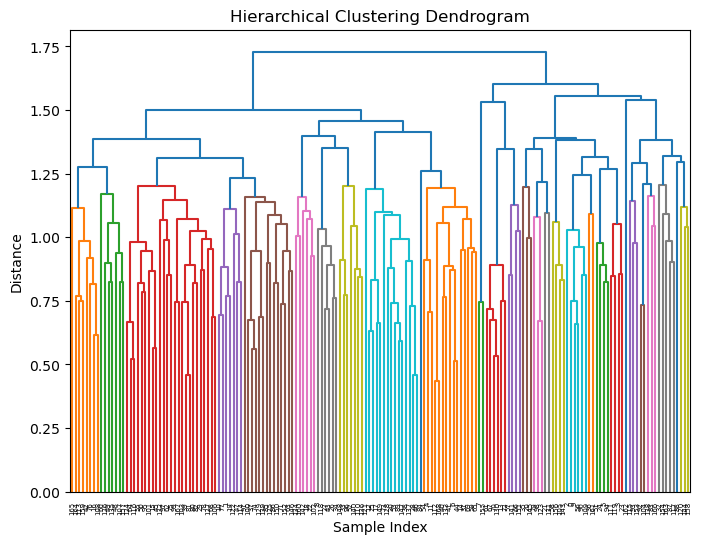

Cluster Labels: [19  4 19 22 10 21 10 12  7 19  4 10  9 13 10  3  1  9  6  4 15 17  6 22
 21  9  7  7  9  3  9 10 27  8  7 15 20  5  9  3 10 10  1  7 10  3  9  4
  2  2  3 21  8  9 10  3 19 14 18 10  2 13  3  5  3 10 14 13  3 10 13  5
 13  9  5  3  1  4  3 16  3  3  3 25 11  5  5 26 29  9 19  5 24 23 21  3
  8  3 16  3  5  3  6  3 24 18  3  2  1 19  8 22 10  1  4 23  3 26  7 22
 28  9  4 16  3  5  2  3  9  5 13 17  3 10  6  2  8  9 25  5  8 14  6 18
 28 15  5  9  8  9  5 14  5 23 26 12 18  2 28  1  6 20 30 26  1  1 25  3
 10]


,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,headquarters region,...,embedding,cluster_label,generated_description,shortened_embedding,shortened_description,target_industries,industries_embedding,shortened_description_embedding,shortened_description2,bert_embedding
0,Pika,1-10,2023,Pika is a startup that is developing an AI-pow...,"Artificial Intelligence (AI), Generative AI, G...","Palo Alto, California, United States",Pika is a startup that develops an AI-powered ...,78,—,"San Francisco Bay Area, Silicon Valley, West C...",...,"[-0.0030207200907170773, 0.012319189496338367,...",19,"Product: Film editing platform, Caption-to-vid...","[-0.004095326643437147, 0.04505584016442299, -...","AI-powered film editing and generation, Video ...","Filmmakers, Video Editors, Content Creators, M...","[-0.013917695730924606, 0.03840973228216171, -...","[-0.013025224208831787, 0.03505336120724678, 0...","film editing and generation, Video creation fr...","[0.086574286, 0.3509696, 0.42089736, 0.1412194..."
1,Contextual AI,1-10,2023,Contextual AI offers a pioneering approach to ...,"Artificial Intelligence (AI), Generative AI, S...","Mountain View, California, United States",Contextual AI offers a pioneering approach to ...,219,94040,"San Francisco Bay Area, Silicon Valley, West C...",...,"[-0.010190815664827824, 0.03487010672688484, 0...",4,"Product: Generative software, Workplace effici...","[0.01654336415231228, 0.023287253454327583, 0....","Generative AI for workplace applications, AI-p...","Corporations, tech companies, startups, AI con...","[-0.023459946736693382, 0.0033064140006899834,...","[0.000775037391576916, 0.00012744541163556278,...","workplace applications, Insights, Strategy Con...","[0.07241155, 0.22152354, 0.3112464, 0.23988587..."
2,Liquid AI,1-10,2023,Liquid AI is a developer of AI applications th...,"Artificial Intelligence (AI), Generative AI, I...","Cambridge, Massachusetts, United States",Liquid AI is a developer of AI applications th...,516,2142,"Greater Boston Area, East Coast, New England",...,"[-0.006979950238019228, 0.014808813109993935, ...",19,"Product: Neural network applications, Creative...","[0.01920264959335327, 0.04073550924658775, 0.0...","AI-driven workflow improvement tools, Creative...","Creative agencies, workflow managers, producti...","[0.014888757839798927, 0.028724199160933495, 0...","[0.009727372787892818, 0.048165734857320786, 0...","workflow improvement tools, Creative Process E...","[0.39010373, 0.2946603, 0.5143907, 0.09073612,..."
3,Ava,1-10,2023,Ava is an AI dating app.,Software,"Paris, Ile-de-France, France",Ava is an AI dating app.,653,—,"European Union (EU), Europe, Middle East, and ...",...,"[-0.024494562298059464, -0.01693483255803585, ...",22,"Product: Dating application, Matchmaking servi...","[-0.0316319614648819, -0.0006165459053590894, ...","AI-powered dating app, Virtual dating assistance","Singles, dating services, online dating industry","[-0.03009849414229393, -0.004982085898518562, ...","[-0.06198641285300255, 0.01912080869078636, 0....","dating app, Virtual dating assistance","[0.31766137, 0.030905485, 0.44550037, 0.044492..."
4,LlamaIndex,1-10,2023,"LlamaIndex is a simple, flexible data framewor...","Artificial Intelligence (AI), Software","San Francisco, California, United States","LlamaIndex is a simple, flexible data framewor...",814,—,"San Francisco Bay Area, West Coast, Western US",...,"[-0.0365283377468586, -0.023378605023026466, 0...",10,"Product: Data framework, Custom data source co...","[0.0005234783166088164, -0.03611835464835167, ...","Data integration, Custom data sourcing, Langua...","Companies dealing with large datasets, data sc...","[0.020727330818772316, -0.01563122123479843, 0...","[-0.049139682203531265, 0.01791500672698021, 0...","Data integration, Custom data sourcing, Langua...","[-0.007811274, 0.0003206219, 0.6476342, 0.3873..."


In [169]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Convert embeddings column to a numpy array
embeddings = np.array(sample_df['embedding'].tolist())

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Convert cosine similarity to cosine distance
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering using the distance matrix
linkage_matrix = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=np.arange(len(embeddings)))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Extract cluster labels (e.g., for 2 clusters)
cluster_labels = fcluster(linkage_matrix, t=30, criterion='maxclust')
print("Cluster Labels:", cluster_labels)

# Add cluster labels to the DataFrame using .loc
sample_df.loc[:, 'cluster_label'] = cluster_labels



# Display the DataFrame with the new cluster labels
sample_df.head()


In [177]:
list(sample_df[sample_df["cluster_label"]==2].generated_description)

['Product: Chatbot tool, Corporate file exploration, Natural language response system\nTarget Client/Industries: Financial analysts, Corporate researchers',
 'Product: Outcome-Oriented Models, Client behavior comprehension, Experience enhancement tools\nTarget Client/Industries: Customer service providers, Retail businesses, E-commerce platforms',
 'Product: Data analysis, Content creation, Marketing performance\nTarget Client/Industries: Research teams, Marketing teams',
 'Product: Sentiment analysis tool, Customer experience insights, Conversation analysis\nTarget Client/Industries: Customer service departments, Market research firms, Social media management teams',
 'Product: Sales conversation analysis, Sales coaching tools, Sales performance metrics\nTarget Client/Industries: B2B sales teams, Sales training organizations',
 'Product: \nReview compilation platform, User feedback analysis\nTarget Client/Industries: \nOnline retailers, E-commerce businesses, Customer service departme

In [176]:
list(sample_df[sample_df["cluster_label"]==2].generated_cluster_label)

['"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"',
 '"Comprehensive Business Communication and Analysis Tools"']

In [178]:


# Function to generate labels using x.ask
def generate_label(text_bubble):
    prompt = f"""
    Your role is to generate a label name for the following combined descriptions. Make it simple and understandable. Make it specific to the industry. Do not use vague words like comprehensive.
    EXAMPLE BELOW
    _________________
    Descriptions:
    'Product: Chatbot tool, Corporate file exploration, Natural language response system\nTarget Client/Industries: Financial analysts, Corporate researchers',
    'Product: Outcome-Oriented Models, Client behavior comprehension, Experience enhancement tools\nTarget Client/Industries: Customer service providers, Retail businesses, E-commerce platforms',
    'Product: Data analysis, Content creation, Marketing performance\nTarget Client/Industries: Research teams, Marketing teams',
    'Product: Sentiment analysis tool, Customer experience insights, Conversation analysis\nTarget Client/Industries: Customer service departments, Market research firms, Social media management teams',
    'Product: Sales conversation analysis, Sales coaching tools, Sales performance metrics\nTarget Client/Industries: B2B sales teams, Sales training organizations',
    'Product: \nReview compilation platform, User feedback analysis\nTarget Client/Industries: \nOnline retailers, E-commerce businesses, Customer service departments',
    'Product: \nConversational platform, Market research tools\nTarget Client/Industries: Marketers, Insight specialists, Market research industry
    Label Name: Sales/Customer Service
    _________________
    Now, your turn:
    Descriptions: {text_bubble}
    Label name:
    """
    return x.ask(prompt)

# Create a dictionary to store text bubbles for each cluster
text_bubbles = {}

# Group descriptions by cluster labels and concatenate them
for label in sample_df['cluster_label'].unique():
    descriptions = list(sample_df[sample_df['cluster_label'] == label]['generated_description'])
    text_bubbles[label] = " ".join(descriptions)

# Generate label names for each cluster
cluster_labels = {}
for label, text_bubble in text_bubbles.items():
    cluster_labels[label] = generate_label(text_bubble)

# Add the generated labels back to the DataFrame
sample_df['generated_cluster_label'] = sample_df['cluster_label'].map(cluster_labels)

# Display the updated DataFrame
print(sample_df)


    organization name num employees founded date  \
0                Pika          1-10         2023   
1       Contextual AI          1-10         2023   
2           Liquid AI          1-10         2023   
3                 Ava          1-10         2023   
4          LlamaIndex          1-10         2023   
..                ...           ...          ...   
164             Twine          1-10         2023   
165          Tabor.AI          1-10         2023   
166           Kontigo          1-10         2023   
167            AiFlow          1-10     Jan 2023   
168           BitSync          1-10         2023   

                                           description  \
0    Pika is a startup that is developing an AI-pow...   
1    Contextual AI offers a pioneering approach to ...   
2    Liquid AI is a developer of AI applications th...   
3                             Ava is an AI dating app.   
4    LlamaIndex is a simple, flexible data framewor...   
..                         

In [183]:
list(sample_df.cluster_label)

[19,
 4,
 19,
 22,
 10,
 21,
 10,
 12,
 7,
 19,
 4,
 10,
 9,
 13,
 10,
 3,
 1,
 9,
 6,
 4,
 15,
 17,
 6,
 22,
 21,
 9,
 7,
 7,
 9,
 3,
 9,
 10,
 27,
 8,
 7,
 15,
 20,
 5,
 9,
 3,
 10,
 10,
 1,
 7,
 10,
 3,
 9,
 4,
 2,
 2,
 3,
 21,
 8,
 9,
 10,
 3,
 19,
 14,
 18,
 10,
 2,
 13,
 3,
 5,
 3,
 10,
 14,
 13,
 3,
 10,
 13,
 5,
 13,
 9,
 5,
 3,
 1,
 4,
 3,
 16,
 3,
 3,
 3,
 25,
 11,
 5,
 5,
 26,
 29,
 9,
 19,
 5,
 24,
 23,
 21,
 3,
 8,
 3,
 16,
 3,
 5,
 3,
 6,
 3,
 24,
 18,
 3,
 2,
 1,
 19,
 8,
 22,
 10,
 1,
 4,
 23,
 3,
 26,
 7,
 22,
 28,
 9,
 4,
 16,
 3,
 5,
 2,
 3,
 9,
 5,
 13,
 17,
 3,
 10,
 6,
 2,
 8,
 9,
 25,
 5,
 8,
 14,
 6,
 18,
 28,
 15,
 5,
 9,
 8,
 9,
 5,
 14,
 5,
 23,
 26,
 12,
 18,
 2,
 28,
 1,
 6,
 20,
 30,
 26,
 1,
 1,
 25,
 3,
 10]

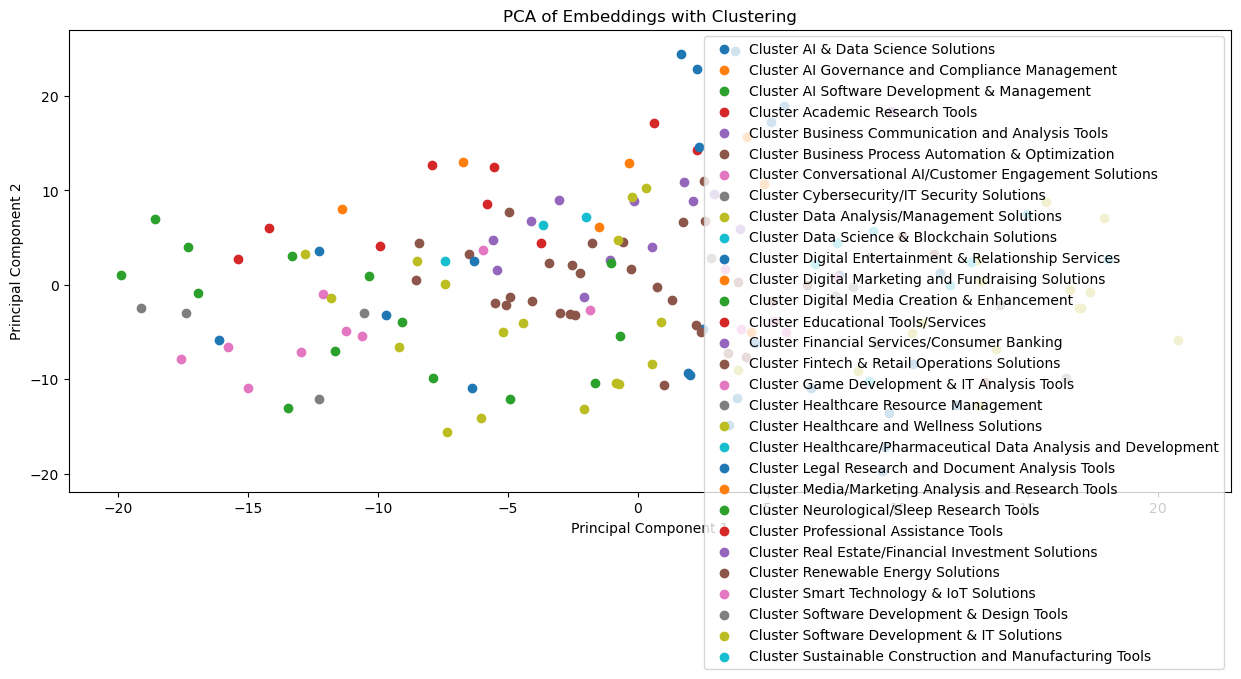

    organization name num employees founded date  \
0                Pika          1-10         2023   
1       Contextual AI          1-10         2023   
2           Liquid AI          1-10         2023   
3                 Ava          1-10         2023   
4          LlamaIndex          1-10         2023   
..                ...           ...          ...   
164             Twine          1-10         2023   
165          Tabor.AI          1-10         2023   
166           Kontigo          1-10         2023   
167            AiFlow          1-10     Jan 2023   
168           BitSync          1-10         2023   

                                           description  \
0    Pika is a startup that is developing an AI-pow...   
1    Contextual AI offers a pioneering approach to ...   
2    Liquid AI is a developer of AI applications th...   
3                             Ava is an AI dating app.   
4    LlamaIndex is a simple, flexible data framewor...   
..                         

In [187]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Convert embeddings column to a numpy array
embeddings = np.array(sample_df['embedding'].tolist())
cluster_labels = sample_df["generated_cluster_label"]
# Standardize the embeddings (optional but recommended)
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_scaled)

# Create a new DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=embeddings_pca, columns=['PC1', 'PC2'])
pca_df['cluster_label'] = cluster_labels

# Plot the PCA results with cluster labels
plt.figure(figsize=(15, 6))
for label in np.unique(cluster_labels):
    subset = pca_df[pca_df['cluster_label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {label}')
plt.title('PCA of Embeddings with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display the DataFrame with the new cluster labels
print(sample_df)


In [184]:
pca_df

,PC1,PC2,cluster_label
0,-13.310558,3.098237,NaN
1,-10.343402,0.871480,Conversational AI/Customer Engagement Solutions
2,-9.063376,-3.913245,Business Communication and Analysis Tools
3,-6.286851,2.557780,Business Process Automation & Optimization
4,10.599595,-8.421306,AI Software Development & Management
...,...,...,...
164,-12.118962,-0.993006,NaN
165,-5.945734,3.635855,NaN
166,0.537042,3.995894,NaN
167,2.535824,11.011376,NaN


In [42]:
sample_df.head()

,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,headquarters region,...,estimated rev,description_all,embedding,cluster_label,generated_description,shortened_embedding,shortened_description,target_industries,industries_embedding,shortened_description_embedding
0,Pika,1-10,2023,Pika is a startup that is developing an AI-pow...,"Artificial Intelligence (AI), Generative AI, G...","Palo Alto, California, United States",Pika is a startup that develops an AI-powered ...,78,—,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Pika is a startup that is developing an AI-pow...,"[0.012334316037595272, 0.006155252456665039, -...",7,Shortened Description: \nAI-powered film editi...,"[-0.004095326643437147, 0.04505584016442299, -...","AI-powered film editing and generation, Video ...","Filmmakers, Video Editors, Content Creators, M...","[-0.013917695730924606, 0.03840973228216171, -...","[-0.011559282429516315, 0.030042029917240143, ..."
1,Contextual AI,1-10,2023,Contextual AI offers a pioneering approach to ...,"Artificial Intelligence (AI), Generative AI, S...","Mountain View, California, United States",Contextual AI offers a pioneering approach to ...,219,94040,"San Francisco Bay Area, Silicon Valley, West C...",...,—,Contextual AI offers a pioneering approach to ...,"[-0.03293931856751442, -0.004699342884123325, ...",11,Shortened Description: \nGenerative AI for wor...,"[0.01654336415231228, 0.023287253454327583, 0....","Generative AI for workplace applications, AI-p...","Corporations, tech companies, startups, AI con...","[-0.023459946736693382, 0.0033064140006899834,...","[0.011943372897803783, 0.006386549212038517, 0..."
2,Liquid AI,1-10,2023,Liquid AI is a developer of AI applications th...,"Artificial Intelligence (AI), Generative AI, I...","Cambridge, Massachusetts, United States",Liquid AI is a developer of AI applications th...,516,2142,"Greater Boston Area, East Coast, New England",...,$1M to $10M,Liquid AI is a developer of AI applications th...,"[-0.030698228627443314, 0.008265865035355091, ...",10,Shortened Description: \nAI-driven workflow im...,"[0.01920264959335327, 0.04073550924658775, 0.0...","AI-driven workflow improvement tools, Creative...","Creative agencies, workflow managers, producti...","[0.014888757839798927, 0.028724199160933495, 0...","[0.018314482644200325, 0.040549661964178085, 0..."
3,Ava,1-10,2023,Ava is an AI dating app.,Software,"Paris, Ile-de-France, France",Ava is an AI dating app.,653,—,"European Union (EU), Europe, Middle East, and ...",...,—,Ava is an AI dating app. Ava is an AI dating app.,"[0.00809679925441742, -0.024050025269389153, 0...",21,"Shortened Description: AI-powered dating app, ...","[-0.0316319614648819, -0.0006165459053590894, ...","AI-powered dating app, Virtual dating assistance","Singles, dating services, online dating industry","[-0.03009849414229393, -0.004982085898518562, ...","[-0.05003318563103676, 0.006910251919180155, 0..."
4,LlamaIndex,1-10,2023,"LlamaIndex is a simple, flexible data framewor...","Artificial Intelligence (AI), Software","San Francisco, California, United States","LlamaIndex is a simple, flexible data framewor...",814,—,"San Francisco Bay Area, West Coast, Western US",...,$1M to $10M,"LlamaIndex is a simple, flexible data framewor...","[-0.021693633869290352, -0.03820231929421425, ...",24,"Shortened Description: \nData integration, Cus...","[0.0005234783166088164, -0.03611835464835167, ...","Data integration, Custom data sourcing, Langua...","Companies dealing with large datasets, data sc...","[0.020727330818772316, -0.01563122123479843, 0...","[-0.049139682203531265, 0.01791500672698021, 0..."
